## **BANK CUSTOMER CHURN PREDICTION**


## **Objective**
The objective of BANK CUSTOMER CHURN PREDICTION is to identify customers at risk of leaving the bank and implement strategies to retain them, thereby maintaining a stable customer base and reducing revenue loss.

## **Data Source**

https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Bank%20Churn%20Modelling.csv

## **Import Library**

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Import Data**

In [60]:
df = pd.read_csv("https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Bank%20Churn%20Modelling.csv")

In [61]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## **Describe Data**

In [62]:
df.describe()


,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [63]:
df.dtypes

CustomerId            int64
Surname              object
CreditScore           int64
Geography            object
Gender               object
Age                   int64
Tenure                int64
Balance             float64
Num Of Products       int64
Has Credit Card       int64
Is Active Member      int64
Estimated Salary    float64
Churn                 int64
dtype: object

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


## **Data Visualization**

Churn
0    7963
1    2037
Name: count, dtype: int64


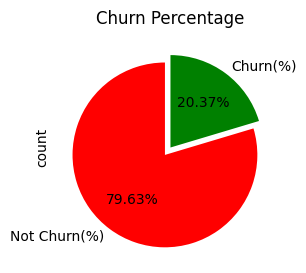

In [65]:

print(df.Churn.value_counts())
df['Churn'].value_counts().plot(
    kind='pie',figsize=(9,3),
    autopct="%1.2f%%",
    startangle=90,
    shadow=False,
    labels=['Not Churn(%)','Churn(%)'],
    colors=['red','green'],explode=[0.1,0])
plt.title('Churn Percentage')
plt.show()

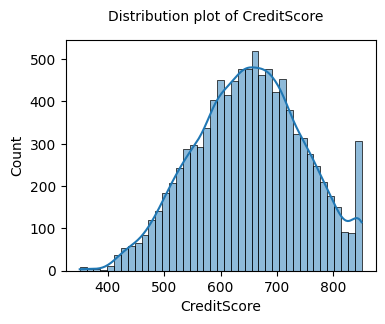

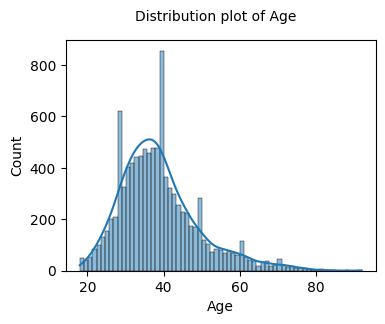

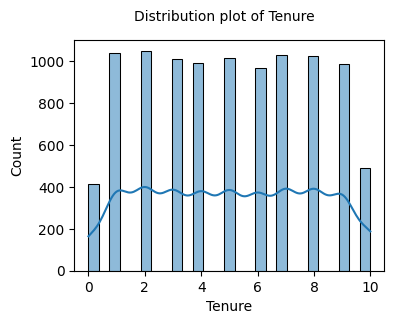

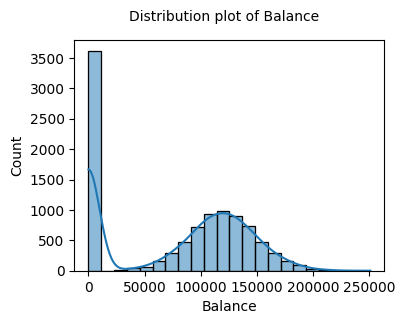

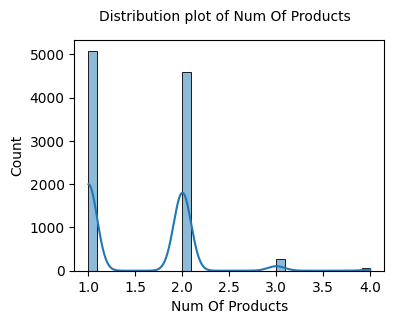

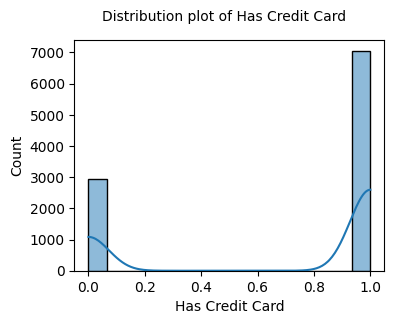

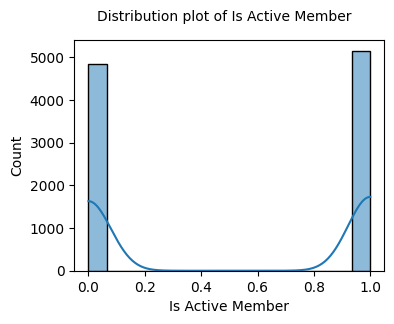

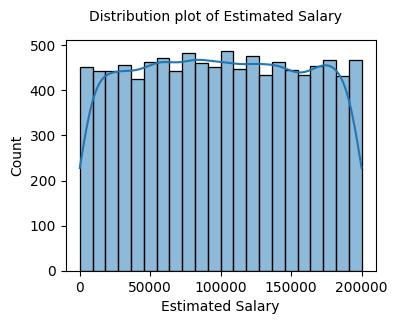

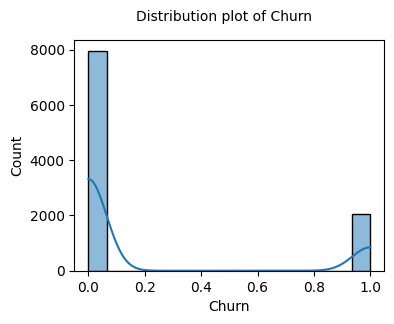

In [66]:
first_column = True
for col in df.describe().columns:
    if first_column:
        first_column = False
        continue
    fig, ax = plt.subplots(figsize=(4, 3))
    sns.histplot(df[col],ax=ax,kde = True)
    fig.suptitle("Distribution plot of "+ col, fontsize = 10)
    plt.show()

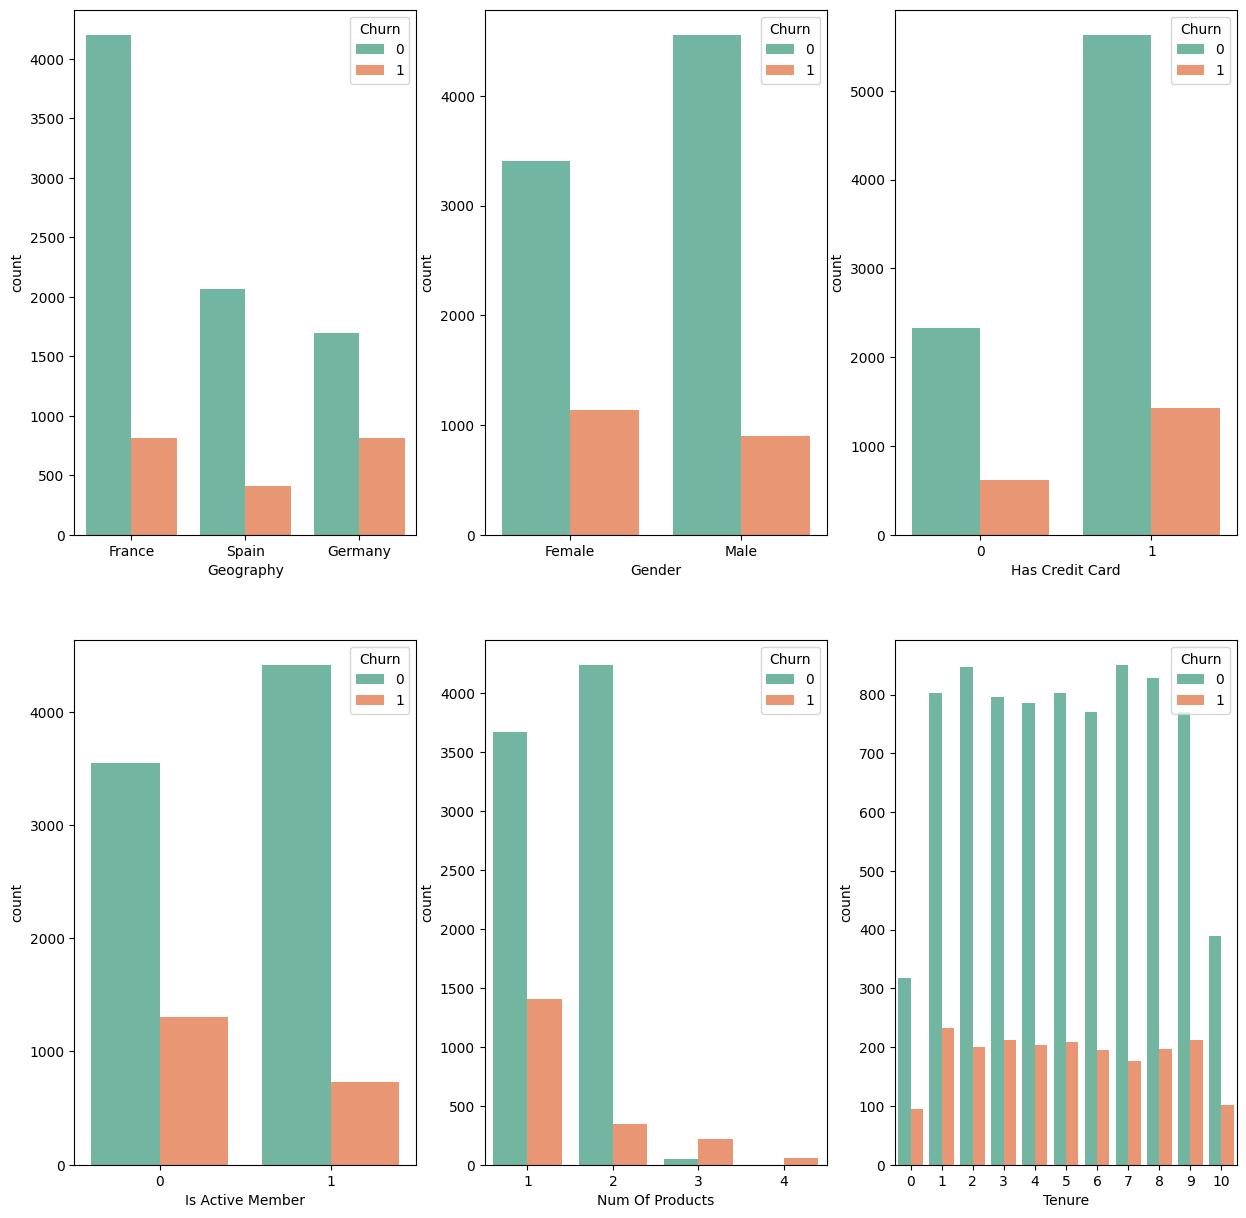

In [67]:
fig, ax = plt.subplots(2, 3, figsize=(15, 15))

sns.countplot(x='Geography', hue='Churn', data=df, palette='Set2', ax=ax[0][0])
sns.countplot(x='Gender', hue='Churn', data=df, palette='Set2', ax=ax[0][1])
sns.countplot(x='Has Credit Card', hue='Churn', data=df, palette='Set2', ax=ax[0][2])
sns.countplot(x='Is Active Member', hue='Churn', data=df, palette='Set2', ax=ax[1][0])
sns.countplot(x='Num Of Products', hue='Churn', data=df, palette='Set2', ax=ax[1][1])
sns.countplot(x='Tenure', hue='Churn', data=df, palette='Set2', ax=ax[1][2])

plt.show()

## **Data Preprocessing**

In [68]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [69]:
df.drop(['CustomerId', 'Surname'], axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [70]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Geography_LabelEncoded'] = label_encoder.fit_transform(df['Geography'])
df['Gender_LabelEncoded'] = label_encoder.fit_transform(df['Gender'])
df.drop(['Geography','Gender'], axis=1, inplace=True)
df.head()

,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn,Geography_LabelEncoded,Gender_LabelEncoded
0,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,2,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,2,0


## **Define Target Variable (y) and Feature Variables (X)**

In [72]:
X = df.drop('Churn', axis=1)
y = df['Churn']

## **Train Test Split**

In [73]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **Modeling**

In [74]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42)

voting_classifier = VotingClassifier(estimators=[
    ('rf', rf_classifier),
    ('xgb', xgb_classifier)
], voting='hard')


voting_classifier.fit(X_train, y_train)



VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))])

## **Model Evaluation**

In [75]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.866
Precision: 0.7990430622009569
Recall: 0.42493638676844786
F1 Score: 0.5548172757475084
Confusion Matrix:
 [[1565   42]
 [ 226  167]]


## **Prediction**

In [76]:
y_pred = voting_classifier.predict(X_test)
print("Predicted Output:", y_pred)

Predicted Output: [0 0 0 ... 1 0 0]


## **Explaination**


After initializing instances of RandomForestClassifier and XGBClassifier, each with 100 trees and a random state of 42, they were incorporated into a VotingClassifier ensemble. This ensemble utilized a 'hard' voting strategy, wherein the final prediction is determined by the most commonly predicted class labels among the constituent classifiers.

Following the ensemble creation, it was trained on the X_train and y_train data. Subsequently, the model's performance was evaluated using metrics such as accuracy, precision, and recall.

Finally, the trained voting_classifier was utilized to predict labels for the test data X_test.